In [1]:
import pandas as pd
import numpy as np

In [2]:
data_enem = pd.read_csv('MICRODADOS_ENEM_2017.csv', encoding = 'latin1', sep= ';')

In [3]:
data_enem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,170003336736,2017,3503208,Araraquara,35,SP,29.0,F,0.0,1,...,A,C,B,B,C,B,B,B,A,A
1,170003333545,2017,5002902,Cassilândia,50,MS,22.0,F,0.0,1,...,A,B,A,A,C,B,A,A,A,A
2,170001663644,2017,3550308,São Paulo,35,SP,38.0,F,0.0,1,...,A,B,A,A,C,A,B,B,A,A
3,170001663645,2017,4209300,Lages,42,SC,35.0,F,0.0,1,...,B,C,A,B,D,A,B,B,A,A
4,170001663646,2017,2704302,Maceió,27,AL,40.0,M,0.0,3,...,A,B,B,A,C,A,C,B,A,A


In [4]:
data_enem = data_enem.dropna(axis = 0, how = 'any')

In [5]:
data_enem.shape

(1301382, 137)

In [6]:
data_enem.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       ...
       'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q026',
       'Q027'],
      dtype='object', length=137)

In [7]:
cols = list(data_enem.columns)

In [8]:
#removendo as colunas que com certza não influenciam na nota
#e que não quero usar
cols.remove('NU_INSCRICAO')
cols.remove('CO_PROVA_CN')
cols.remove('CO_PROVA_CH')
cols.remove('CO_PROVA_LC')
cols.remove('CO_PROVA_MT')
cols.remove('TX_RESPOSTAS_CN')
cols.remove('TX_RESPOSTAS_CH')
cols.remove('TX_RESPOSTAS_LC')
cols.remove('TX_RESPOSTAS_MT')
cols.remove('TX_GABARITO_CN')
cols.remove('TX_GABARITO_CH')
cols.remove('TX_GABARITO_LC')
cols.remove('TX_GABARITO_MT')

In [9]:
data_enem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301382 entries, 84 to 6731338
Columns: 137 entries, NU_INSCRICAO to Q027
dtypes: float64(31), int64(63), object(43)
memory usage: 1.3+ GB


In [10]:
data_enem.dtypes

NU_INSCRICAO                 int64
NU_ANO                       int64
CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
CO_UF_RESIDENCIA             int64
SG_UF_RESIDENCIA            object
NU_IDADE                   float64
TP_SEXO                     object
TP_ESTADO_CIVIL            float64
TP_COR_RACA                  int64
TP_NACIONALIDADE             int64
CO_MUNICIPIO_NASCIMENTO    float64
NO_MUNICIPIO_NASCIMENTO     object
CO_UF_NASCIMENTO           float64
SG_UF_NASCIMENTO            object
TP_ST_CONCLUSAO              int64
TP_ANO_CONCLUIU              int64
TP_ESCOLA                    int64
TP_ENSINO                  float64
IN_TREINEIRO                 int64
CO_ESCOLA                  float64
CO_MUNICIPIO_ESC           float64
NO_MUNICIPIO_ESC            object
CO_UF_ESC                  float64
SG_UF_ESC                   object
TP_DEPENDENCIA_ADM_ESC     float64
TP_LOCALIZACAO_ESC         float64
TP_SIT_FUNC_ESC            float64
IN_BAIXA_VISAO      

In [11]:
data_enem = data_enem[cols]

In [12]:
data_enem.memory_usage(deep = True)

Index                       10411056
NU_ANO                      10411056
CO_MUNICIPIO_RESIDENCIA     10411056
NO_MUNICIPIO_RESIDENCIA    100713481
CO_UF_RESIDENCIA            10411056
SG_UF_RESIDENCIA            76781538
NU_IDADE                    10411056
TP_SEXO                     85891212
TP_ESTADO_CIVIL             10411056
TP_COR_RACA                 10411056
TP_NACIONALIDADE            10411056
CO_MUNICIPIO_NASCIMENTO     10411056
NO_MUNICIPIO_NASCIMENTO    100326797
CO_UF_NASCIMENTO            10411056
SG_UF_NASCIMENTO            76781538
TP_ST_CONCLUSAO             10411056
TP_ANO_CONCLUIU             10411056
TP_ESCOLA                   10411056
TP_ENSINO                   10411056
IN_TREINEIRO                10411056
CO_ESCOLA                   10411056
CO_MUNICIPIO_ESC            10411056
NO_MUNICIPIO_ESC           100577191
CO_UF_ESC                   10411056
SG_UF_ESC                   76781538
TP_DEPENDENCIA_ADM_ESC      10411056
TP_LOCALIZACAO_ESC          10411056
T

In [13]:
data_enem.dtypes[data_enem.dtypes == 'object'].reset_index()

,index,0
0,NO_MUNICIPIO_RESIDENCIA,object
1,SG_UF_RESIDENCIA,object
2,TP_SEXO,object
3,NO_MUNICIPIO_NASCIMENTO,object
4,SG_UF_NASCIMENTO,object
5,NO_MUNICIPIO_ESC,object
6,SG_UF_ESC,object
7,NO_MUNICIPIO_PROVA,object
8,SG_UF_PROVA,object
9,Q001,object


In [14]:
for colun in list(data_enem.dtypes[data_enem.dtypes == 'object'].reset_index()['index']):
    print(colun)
    data_enem[colun] = data_enem[colun].astype('category')

NO_MUNICIPIO_RESIDENCIA
SG_UF_RESIDENCIA
TP_SEXO
NO_MUNICIPIO_NASCIMENTO
SG_UF_NASCIMENTO
NO_MUNICIPIO_ESC
SG_UF_ESC
NO_MUNICIPIO_PROVA
SG_UF_PROVA
Q001
Q002
Q003
Q004
Q006
Q007
Q008
Q009
Q010
Q011
Q012
Q013
Q014
Q015
Q016
Q017
Q018
Q019
Q020
Q021
Q022
Q023
Q024
Q025
Q026
Q027


In [15]:
data_enem

,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
84,2017,2927408,Salvador,29,BA,31.0,F,0.0,2,1,...,A,A,A,A,A,B,A,A,C,A
92,2017,3550308,São Paulo,35,SP,17.0,F,0.0,3,1,...,A,C,B,A,D,B,B,B,B,A
112,2017,3545803,Santa Bárbara d'Oeste,35,SP,18.0,F,0.0,2,1,...,B,B,B,A,D,A,B,B,B,A
117,2017,2919157,Lapão,29,BA,17.0,M,0.0,1,1,...,A,B,A,A,C,A,B,A,B,E
158,2017,3512902,Cosmorama,35,SP,17.0,M,0.0,2,1,...,A,B,B,A,C,A,C,B,B,A
166,2017,4105904,Colorado,41,PR,18.0,F,0.0,1,1,...,A,B,A,A,D,B,B,B,B,D
245,2017,3500501,Águas de Lindóia,35,SP,17.0,F,0.0,1,1,...,A,B,B,B,C,B,B,B,B,E
257,2017,3552502,Suzano,35,SP,17.0,M,0.0,1,1,...,B,D,B,B,E,B,E,B,B,A
263,2017,3506003,Bauru,35,SP,19.0,F,0.0,1,1,...,A,B,A,B,B,B,B,B,B,B
283,2017,4106902,Curitiba,41,PR,18.0,F,0.0,1,1,...,B,D,B,B,E,B,E,B,B,D


In [16]:
data_enem.head()

,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
84,2017,2927408,Salvador,29,BA,31.0,F,0.0,2,1,...,A,A,A,A,A,B,A,A,C,A
92,2017,3550308,São Paulo,35,SP,17.0,F,0.0,3,1,...,A,C,B,A,D,B,B,B,B,A
112,2017,3545803,Santa Bárbara d'Oeste,35,SP,18.0,F,0.0,2,1,...,B,B,B,A,D,A,B,B,B,A
117,2017,2919157,Lapão,29,BA,17.0,M,0.0,1,1,...,A,B,A,A,C,A,B,A,B,E
158,2017,3512902,Cosmorama,35,SP,17.0,M,0.0,2,1,...,A,B,B,A,C,A,C,B,B,A


In [17]:
data_enem.dtypes

NU_ANO                        int64
CO_MUNICIPIO_RESIDENCIA       int64
NO_MUNICIPIO_RESIDENCIA    category
CO_UF_RESIDENCIA              int64
SG_UF_RESIDENCIA           category
NU_IDADE                    float64
TP_SEXO                    category
TP_ESTADO_CIVIL             float64
TP_COR_RACA                   int64
TP_NACIONALIDADE              int64
CO_MUNICIPIO_NASCIMENTO     float64
NO_MUNICIPIO_NASCIMENTO    category
CO_UF_NASCIMENTO            float64
SG_UF_NASCIMENTO           category
TP_ST_CONCLUSAO               int64
TP_ANO_CONCLUIU               int64
TP_ESCOLA                     int64
TP_ENSINO                   float64
IN_TREINEIRO                  int64
CO_ESCOLA                   float64
CO_MUNICIPIO_ESC            float64
NO_MUNICIPIO_ESC           category
CO_UF_ESC                   float64
SG_UF_ESC                  category
TP_DEPENDENCIA_ADM_ESC      float64
TP_LOCALIZACAO_ESC          float64
TP_SIT_FUNC_ESC             float64
IN_BAIXA_VISAO              

In [18]:
data_enem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301382 entries, 84 to 6731338
Columns: 124 entries, NU_ANO to Q027
dtypes: category(35), float64(27), int64(62)
memory usage: 942.7 MB


In [19]:
data_enem.shape

(1301382, 124)

In [20]:
#criando a coluna das notas medias
data_enem['NOTA_MED'] = (data_enem.NU_NOTA_CH + data_enem.NU_NOTA_CN + data_enem.NU_NOTA_LC + data_enem.NU_NOTA_MT + data_enem.NU_NOTA_REDACAO)/5

In [21]:
for col in list(data_enem.dtypes[data_enem.dtypes == 'category'].reset_index()['index']):
    data_enem[col+'_c'] = data_enem[col].cat.codes

In [22]:
data_enem.head()

,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,...,Q018_c,Q019_c,Q020_c,Q021_c,Q022_c,Q023_c,Q024_c,Q025_c,Q026_c,Q027_c
84,2017,2927408,Salvador,29,BA,31.0,F,0.0,2,1,...,0,0,0,0,0,1,0,0,2,0
92,2017,3550308,São Paulo,35,SP,17.0,F,0.0,3,1,...,0,2,1,0,3,1,1,1,1,0
112,2017,3545803,Santa Bárbara d'Oeste,35,SP,18.0,F,0.0,2,1,...,1,1,1,0,3,0,1,1,1,0
117,2017,2919157,Lapão,29,BA,17.0,M,0.0,1,1,...,0,1,0,0,2,0,1,0,1,4
158,2017,3512902,Cosmorama,35,SP,17.0,M,0.0,2,1,...,0,1,1,0,2,0,2,1,1,0


Iniciarei a aplicar o PCA, o primeiro passo será separar em treino e teste

In [23]:
list(data_enem.columns)

['NU_ANO',
 'CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'SG_UF_NASCIMENTO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_ESTUDA_CLASSE_HOSPITALAR',
 'IN_SEM_RECURSO',
 'IN_BRAILLE',
 'IN_AMPLIADA_24',
 'IN_AMPLIADA_18',
 'IN_LEDOR',
 'IN_ACESSO',
 'IN_TRANSCRICAO',
 'IN_LIBRAS',

In [38]:
col_usadas = ['NU_ANO',
 'CO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'CO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_ESTUDA_CLASSE_HOSPITALAR',
 'IN_SEM_RECURSO',
 'IN_BRAILLE',
 'IN_AMPLIADA_24',
 'IN_AMPLIADA_18',
 'IN_LEDOR',
 'IN_ACESSO',
 'IN_TRANSCRICAO',
 'IN_LIBRAS',
 'IN_LEITURA_LABIAL',
 'IN_MESA_CADEIRA_RODAS',
 'IN_MESA_CADEIRA_SEPARADA',
 'IN_APOIO_PERNA',
 'IN_GUIA_INTERPRETE',
 'IN_COMPUTADOR',
 'IN_CADEIRA_ESPECIAL',
 'IN_CADEIRA_CANHOTO',
 'IN_CADEIRA_ACOLCHOADA',
 'IN_PROVA_DEITADO',
 'IN_MOBILIARIO_OBESO',
 'IN_LAMINA_OVERLAY',
 'IN_PROTETOR_AURICULAR',
 'IN_MEDIDOR_GLICOSE',
 'IN_MAQUINA_BRAILE',
 'IN_SOROBAN',
 'IN_MARCA_PASSO',
 'IN_SONDA',
 'IN_MEDICAMENTOS',
 'IN_SALA_INDIVIDUAL',
 'IN_SALA_ESPECIAL',
 'IN_SALA_ACOMPANHANTE',
 'IN_MOBILIARIO_ESPECIFICO',
 'IN_MATERIAL_ESPECIFICO',
 'IN_NOME_SOCIAL',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NOTA_MED',
 'NO_MUNICIPIO_RESIDENCIA_c',
 'SG_UF_RESIDENCIA_c',
 'TP_SEXO_c',
 'NO_MUNICIPIO_NASCIMENTO_c',
 'SG_UF_NASCIMENTO_c',
 'NO_MUNICIPIO_ESC_c',
 'SG_UF_ESC_c',
 'NO_MUNICIPIO_PROVA_c',
 'SG_UF_PROVA_c',
 'Q001_c',
 'Q002_c',
 'Q003_c',
 'Q004_c',
 'Q006_c',
 'Q007_c',
 'Q008_c',
 'Q009_c',
 'Q010_c',
 'Q011_c',
 'Q012_c',
 'Q013_c',
 'Q014_c',
 'Q015_c',
 'Q016_c',
 'Q017_c',
 'Q018_c',
 'Q019_c',
 'Q020_c',
 'Q021_c',
 'Q022_c',
 'Q023_c',
 'Q024_c',
 'Q025_c',
 'Q026_c',
 'Q027_c']

In [39]:
data_enem = data_enem[col_usadas]

In [40]:
list(data_enem.columns)

['NU_ANO',
 'CO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'CO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_ESTUDA_CLASSE_HOSPITALAR',
 'IN_SEM_RECURSO',
 'IN_BRAILLE',
 'IN_AMPLIADA_24',
 'IN_AMPLIADA_18',
 'IN_LEDOR',
 'IN_ACESSO',
 'IN_TRANSCRICAO',
 'IN_LIBRAS',
 'IN_LEITURA_LABIAL',
 'IN_MESA_CADEIRA_RODAS',
 'IN_MESA_CADEIRA_SEPARADA',
 'IN_APOIO_PERNA',
 'IN_GUIA_INTERPRETE',
 'IN_COMPUTADOR',
 'IN_CA

In [41]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data_enem.drop('NOTA_MED', axis =1 ),
                                                   data_enem.NOTA_MED,
                                                   test_size = 1/5.0,
                                                   random_state = 0)

Agora iremos normalizar as colunas

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [43]:
from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(train_x)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [44]:
pca.n_components_

72

In [45]:
train_x = pca.transform(train_x)
test_x = pca.transform(test_x)

In [46]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [47]:
lm.fit(train_x, train_y)
lm.score(train_x, train_y)
lm.score(test_x, test_y)

0.47623193963591126

In [48]:
lm.score(train_x, train_y)

0.47628344910308534

In [54]:
list(zip(data_enem.columns,list(lm.coef_)))

[('NU_ANO', 9.527649368683788),
 ('CO_MUNICIPIO_RESIDENCIA', 11.200101530449336),
 ('CO_UF_RESIDENCIA', 4.7367046358892715),
 ('NU_IDADE', -1.9310237192405992),
 ('TP_ESTADO_CIVIL', -2.4217637800719176),
 ('TP_COR_RACA', 1.5176517171135702),
 ('TP_NACIONALIDADE', 0.299685371989328),
 ('CO_MUNICIPIO_NASCIMENTO', -3.5147769944987868),
 ('CO_UF_NASCIMENTO', -2.6132728304892527),
 ('TP_ST_CONCLUSAO', 8.456928466633078),
 ('TP_ANO_CONCLUIU', -4.61555929585832),
 ('TP_ESCOLA', 1.0267956299314909),
 ('TP_ENSINO', 1.136506165052419),
 ('IN_TREINEIRO', -2.0970027983061423),
 ('CO_ESCOLA', 0.13931313434425918),
 ('CO_MUNICIPIO_ESC', -0.9680442289944),
 ('CO_UF_ESC', -0.20027694024936718),
 ('TP_DEPENDENCIA_ADM_ESC', 7.787292860190801),
 ('TP_LOCALIZACAO_ESC', -4.708586947291994),
 ('TP_SIT_FUNC_ESC', -0.40452797805615026),
 ('IN_BAIXA_VISAO', 0.37796488256488614),
 ('IN_CEGUEIRA', -2.8141250424958346),
 ('IN_SURDEZ', 3.9899027561111837),
 ('IN_DEFICIENCIA_AUDITIVA', -0.0603974108872658),
 ('IN_S

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

[0, 1000, 0, 1000]

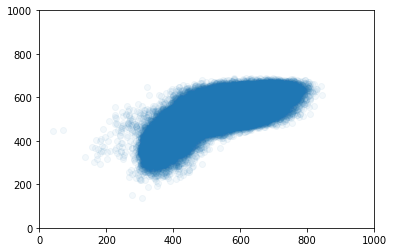

In [61]:
plt.scatter(test_y, lm.predict(test_x), alpha = 0.05)
plt.axis([0,1000,0,1000])